In [ ]:
import pandas as pd

load data

In [81]:
eqbench_df = pd.read_csv("data/2024-02-07/eqbench.csv")
lmsys_df = pd.read_csv("data/2024-02-07/lmsys.csv")
alpaca2_df = pd.read_csv("data/2024-02-07/alpaca2.csv")

calc correlation

In [82]:
# normalize model names
eqbench_df['Model'] = eqbench_df['Model'].apply(lambda x: x.split('/')[-1].lower())
lmsys_df['Model'] = lmsys_df['Model'].apply(lambda x: x.lower())
alpaca2_df['Model'] = alpaca2_df['Model'].apply(lambda x: x.strip().replace(" ", "-").lower())
alpaca2_df['Alpaca WR'] = alpaca2_df['Alpaca WR'].str.rstrip('%').astype(float) / 100

normalized_intersection = pd.merge(eqbench_df, lmsys_df, on='Model', how='inner')
normalized_intersection = pd.merge(normalized_intersection, alpaca2_df, on='Model', how='inner')
normalized_scores_df = normalized_intersection[['Arena Elo', 'EQ-Bench v2 Score*', 'MT-bench', 'MMLU', 'Alpaca WR']]

# calculate correlations (Pearson, Spearman, Kendall's tau)
normalized_pearson_corr = normalized_scores_df.corr(method='pearson')
normalized_spearman_corr = normalized_scores_df.corr(method='spearman')
normalized_kendall_corr = normalized_scores_df.corr(method='kendall')

visualise

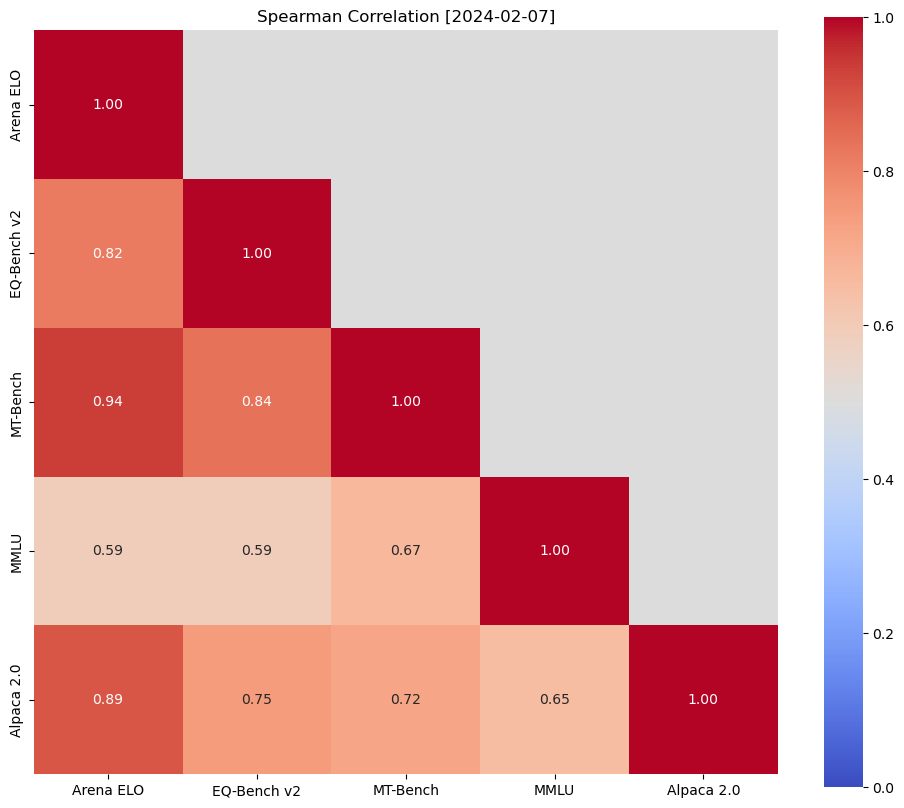

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

normalized_pearson_corr = normalized_spearman_corr.astype(float)

mask = np.triu(np.ones_like(normalized_pearson_corr, dtype=bool), k=1)

row_labels = ['Arena ELO', 'EQ-Bench v2', 'MT-Bench', 'MMLU', "Alpaca 2.0"]
plt.figure(figsize=(12, 10))
g = sns.heatmap(normalized_pearson_corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=0,
                vmax=1, cbar=True, square=True, xticklabels=row_labels, yticklabels=row_labels, mask=mask)
g.set_facecolor('gainsboro')
plt.title('Spearman Correlation [2024-02-07]')
#plt.show()
plt.savefig('figures/arena-eqbench-mtbench-mmlu-alpaca.png')